In [1]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3, 3),
                        activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(units=512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Using TensorFlow backend.


In [2]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [3]:
from keras.preprocessing.image import ImageDataGenerator

'''
Use a data augmentation to generate modified samples.
It depress the overfitting of model.
'''
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
# Validation and test dataset must keep integrity!
validation_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
import os

dataset_dir = '/home/guhwanbae/workspace/machine-learning/resource/cats-and-dogs-small'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'validation')

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [5]:
'''
train_generator make a batch which contains 20 samples.
fit_generator procedure call train_generator 100 times to process 2000 samples in train dataset.
'''

history = model.fit_generator(train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6895 - acc: 0.5263 - val_loss: 0.6694 - val_acc: 0.5787
Epoch 2/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6739 - acc: 0.5684 - val_loss: 0.6633 - val_acc: 0.5818
Epoch 3/100
100/100 [==============================] - 18s 175ms/step - loss: 0.6576 - acc: 0.5950 - val_loss: 0.6898 - val_acc: 0.5317
Epoch 4/100
100/100 [==============================] - 18s 180ms/step - loss: 0.6319 - acc: 0.6350 - val_loss: 0.6130 - val_acc: 0.6566
Epoch 5/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6172 - acc: 0.6641 - val_loss: 0.5928 - val_acc: 0.6840
Epoch 6/100
100/100 [==============================] - 19s 192ms/step - loss: 0.6040 - acc: 0.6716 - val_loss: 0.6013 - val_acc: 0.6611
Epoch 7/100
100/100 [==============================] - 18s 177ms/step - loss: 0.6043 - acc: 0.6678 - val_loss: 0.5851 - val_acc: 0.6796
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 18s 179ms/step - loss: 0.3952 - acc: 0.8203 - val_loss: 0.4535 - val_acc: 0.7990
Epoch 62/100
100/100 [==============================] - 18s 179ms/step - loss: 0.4080 - acc: 0.8122 - val_loss: 0.5971 - val_acc: 0.7538
Epoch 63/100
100/100 [==============================] - 18s 178ms/step - loss: 0.4010 - acc: 0.8178 - val_loss: 0.4289 - val_acc: 0.8073
Epoch 64/100
100/100 [==============================] - 17s 173ms/step - loss: 0.3953 - acc: 0.8166 - val_loss: 0.4496 - val_acc: 0.7957
Epoch 65/100
100/100 [==============================] - 17s 175ms/step - loss: 0.4088 - acc: 0.7994 - val_loss: 0.4860 - val_acc: 0.7951
Epoch 66/100
100/100 [==============================] - 18s 177ms/step - loss: 0.3908 - acc: 0.8269 - val_loss: 0.5041 - val_acc: 0.7893
Epoch 67/100
100/100 [==============================] - 18s 176ms/step - loss: 0.3836 - acc: 0.8275 - val_loss: 0.4962 - val_acc: 0.7843
Epoch 68/100
100/100 [===================

In [6]:
model.save('cats_and_dogs_small_data_aug_1.h5')

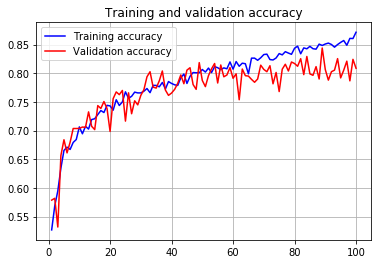

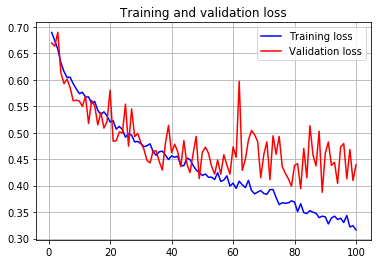

'\nValidation curve follow training curve.\nImage augmentation and dropout method depress that model is overfitting.\n'

In [9]:
import numpy as np
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = np.arange(len(acc)) + 1

plt.figure('Accuracy')
plt.title('Training and validation accuracy')
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.legend()
plt.grid()
plt.show()

plt.figure('Loss')
plt.title('Training and validation loss')
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.legend()
plt.grid()
plt.show()

'''
Validation curve follow training curve.
Image augmentation and dropout method depress that model is overfitting.
'''